# Descrição

Este projeto busca modelar em um grafo as relações entre empresa - orgão publico, quando ocorre uma licitação. Assim, podemos pensar que o grafo poderá ser dividido em dois subconjuntos de vértices (empresa e orgão público), ou seja, será um grafo bipartido.


## Dados

-   Os dados foram obtidos através do portal da transparência, https://portaldatransparencia.gov.br/download-de-dados, na aba de licitações e contratos.
-   Para limitar o escopo da análise, foi definido que apenas licitações do ano de 2022 serão utilizadas. E além disso, as analises serão feitas apenas em licitações que ocorreram na município Curitiba.
-   A pasta baixada possui as seguintes tabelas:
    -   Licitacoes: 
    -   Participantes;
    -   Itens
    -   Empenhos Relacionados

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import networkx as nx

%matplotlib inline

### Load Data

In [2]:
def concatena_csv_em_pasta(pasta):
    # Verifica se a pasta existe
    if not os.path.exists(pasta):
        return None

    arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

    if not arquivos_csv:
        return None

    # Cria uma lista para armazenar os DataFrames dos arquivos CSV
    dfs = []

    for arquivo_csv in arquivos_csv:
        caminho_arquivo = os.path.join(pasta, arquivo_csv)
        df = pd.read_csv(caminho_arquivo,  sep=';', encoding='ANSI')
        print(df)
        dfs.append(df)

    # Concatena todos os DataFrames em um único DataFrame
    dataframe_concatenado = pd.concat(dfs, ignore_index=True)

    return dataframe_concatenado

licitacoes = 'C:\\Users\\rodri\\Documents\\CienciadasRedes\\data_APS\\licitacoes_2022'
participantes = 'C:\\Users\\rodri\\Documents\\CienciadasRedes\\data_APS\\participantes_2022'
itens = 'C:\\Users\\rodri\\Documents\\CienciadasRedes\\data_APS\\itens_2022'
empenhos_relacionados = 'C:\\Users\\rodri\\Documents\\CienciadasRedes\\data_APS\\empenhosRelacionados_2022'


df_licitacoes22 = concatena_csv_em_pasta(licitacoes)
df_participantes22 = concatena_csv_em_pasta(participantes)
df_itens22 = concatena_csv_em_pasta(itens)
df_empenhos_relacionados22 = concatena_csv_em_pasta(empenhos_relacionados)

      Número Licitação  Código UG  \
0                12021     130088   
1                12021     152803   
2                12021     153254   
3                12021     160047   
4                12021     160058   
...                ...        ...   
3690         900682021     926137   
3691         900782021     926137   
3692         900802021     926137   
3693         901192021     926137   
3694         910352020     120060   

                                           Nome UG  Código Modalidade Compra  \
0      SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC                         5   
1                INST.FED.DE ALAGOAS/CAMPUS MURICI                       -99   
2                         ADMINISTRACAO GERAL/UFMG                       -99   
3                       COMANDO 10ª REGIAO MILITAR                       -99   
4               32 GRUPO DE ARTILHARIA DE CAMPANHA                       -99   
...                                            ...                       ..

C:\Users\rodri\AppData\Local\Temp\ipykernel_3368\1867545344.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo,  sep=';', encoding='ANSI')


        Número Licitação  Código UG  \
0                  12021     130088   
1                  12021     130088   
2                  12021     130088   
3                  12021     130088   
4                  12021     130088   
...                  ...        ...   
176356         910352020     120060   
176357         910352020     120060   
176358         910352020     120060   
176359         910352020     120060   
176360         910352020     120060   

                                            Nome UG  Código Modalidade Compra  \
0       SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC                         5   
1       SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC                         5   
2       SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC                         5   
3       SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC                         5   
4       SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC                         5   
...                                          

C:\Users\rodri\AppData\Local\Temp\ipykernel_3368\1867545344.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo,  sep=';', encoding='ANSI')


        Número Licitação  Código UG  \
0                  12022     929546   
1                  12022     929546   
2                  12022     929546   
3                  12022     929546   
4                  12022     114605   
...                  ...        ...   
454395         993092022     910809   
454396         993092022     910809   
454397         993092022     910809   
454398         993092022     910809   
454399         994872022     154040   

                                              Nome UG  \
0       CONSELHO REG.DE FIS. E TERAPIA OCUPACIONAL-PI   
1       CONSELHO REG.DE FIS. E TERAPIA OCUPACIONAL-PI   
2       CONSELHO REG.DE FIS. E TERAPIA OCUPACIONAL-PI   
3       CONSELHO REG.DE FIS. E TERAPIA OCUPACIONAL-PI   
4         SUPERINTENDENCIA ESTADUAL EM RORAIMA-SES-RR   
...                                               ...   
454395      CENTRAIS ELETRICAS DO NORTE DO BRASIL S/A   
454396      CENTRAIS ELETRICAS DO NORTE DO BRASIL S/A   
454397      CENTRA

C:\Users\rodri\AppData\Local\Temp\ipykernel_3368\1867545344.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo,  sep=';', encoding='ANSI')


        Número Licitação  Código UG  \
0                  12019     495600   
1                  12019     495600   
2                  12019     495600   
3                  12019     495600   
4                  12021     160059   
...                  ...        ...   
418304         938862022     910809   
418305         938862022     910809   
418306         938862022     910809   
418307         938862022     910809   
418308         967302022     154040   

                                           Nome UG  Código Modalidade Compra  \
0       COMPANHIA DE PESQUISA DE RECURSOS MINERAIS                         6   
1       COMPANHIA DE PESQUISA DE RECURSOS MINERAIS                         6   
2       COMPANHIA DE PESQUISA DE RECURSOS MINERAIS                         6   
3       COMPANHIA DE PESQUISA DE RECURSOS MINERAIS                         6   
4                  BATALHAO DE GUARDA PRESIDENCIAL                       -99   
...                                            ... 

C:\Users\rodri\AppData\Local\Temp\ipykernel_3368\1867545344.py:16: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_arquivo,  sep=';', encoding='ANSI')


        Número Licitação  Código UG  \
0                  12019     153080   
1                  12022     110001   
2                  12022     110161   
3                  12022     114615   
4                  12022     120060   
...                  ...        ...   
480514         910082022     120060   
480515         910082022     120060   
480516         910082022     120060   
480517         910082022     120060   
480518         920072022     153035   

                                             Nome UG  \
0                 UNIVERSIDADE FEDERAL DE PERNAMBUCO   
1                     SECRETARIA DE ADMINISTRACAO/PR   
2       SUPERINTENDENCIA REG. DE ADMIN. DA 1ª REGIAO   
3       SUPERINTENDENCIA ESTADUAL DO IBGE EM ALAGOAS   
4                            ACADEMIA DA FORCA AEREA   
...                                              ...   
480514                       ACADEMIA DA FORCA AEREA   
480515                       ACADEMIA DA FORCA AEREA   
480516                     

In [3]:
df_licitacoes22.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
0,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,Objeto: Pregão Eletrônico - Contratação de em...,Evento de Resultado de Julgame,22000,Ministério da Agricultura e Pecuária,22000,Ministério da Agricultura e Pecuária - Unidad,AC,RIO BRANCO,03/01/2022,29/12/2021,"703363,4400"
1,12021,152803,INST.FED.DE ALAGOAS/CAMPUS MURICI,-99,Pregão - Registro de Preço,23041005892202197,Objeto: Pregão Eletrônico - Aquisição de reag...,Evento de Resultado de Julgame,26000,Ministério da Educação,26402,Instituto Federal de Alagoas,AL,MURICI,17/01/2022,13/01/2022,"1520,0000"
2,12021,153254,ADMINISTRACAO GERAL/UFMG,-99,Pregão - Registro de Preço,23072242423202017,Objeto: Pregão Eletrônico - Contratação de se...,Publicado,26000,Ministério da Educação,26238,Universidade Federal de Minas Gerais,MG,BELO HORIZONTE,21/01/2022,20/01/2022,"249,9100"
3,12021,160047,COMANDO 10ª REGIAO MILITAR,-99,Pregão - Registro de Preço,64305058862202112,Objeto: Pregão Eletrônico - Registro de Preço...,Evento de Resultado de Julgame,52000,Ministério da Defesa,52121,Comando do Exército,CE,FORTALEZA,19/01/2022,29/11/2021,"945213,9000"
4,12021,160058,32 GRUPO DE ARTILHARIA DE CAMPANHA,-99,Pregão - Registro de Preço,64561000645202111,Objeto: Pregão Eletrônico - Aquisição de medi...,Evento de Resultado de Julgame,52000,Ministério da Defesa,52121,Comando do Exército,DF,BRASILIA,04/01/2022,13/12/2021,"10523,0000"


In [4]:
df_licitacoes22.rename(columns={'Município': 'Municipio'}, inplace=True)
df_licitacoes22['Situação Licitação'].value_counts()

Situação Licitação
Encerrado                         62569
Publicado                         30831
Evento de Resultado de Julgame    10357
Evento de Suspensão Publicado      1236
Evento de Alteração Publicado       953
Divulgado                           720
Evento de Adiamento Publicado       480
Revogação                           434
Anulação                            418
Evento de Revogação Publicado       341
Evento de Alteração de Resulta      199
Evento de Anulação Publicado        195
Retificação                         159
Evento de Retificação Publicad       79
Evento de Retificação Divulgad       47
Evento de Adiamento Divulgado        45
Evento de Reabertura de Prazo        38
Inválido                             32
Evento de Alteração Divulgado        32
Evento de Revogação Divulgado        18
Evento de Habilitação Publicad        8
Pendente de Processamento             3
Evento de Alteração de Habilit        2
Name: count, dtype: int64

In [5]:
df_participantes22.head()


,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Órgão,Nome Órgão,Código Item Compra,Descrição Item Compra,Código Participante,Nome Participante,Flag Vencedor
0,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100001,PRESTACAO DE SERVICOS DE APOIO ADMINISTRATIVO,11976654000171,EBENEZER SERVICOS LTDA,NÃO
1,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100001,PRESTACAO DE SERVICOS DE APOIO ADMINISTRATIVO,08055277000123,SURICATE SERVICOS TERCEIRIZADOS LTDA,NÃO
2,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100001,PRESTACAO DE SERVICOS DE APOIO ADMINISTRATIVO,09257500000188,MONTEIRO & SOARES CONSTRUCOES LTDA,NÃO
3,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100001,PRESTACAO DE SERVICOS DE APOIO ADMINISTRATIVO,20345453000167,F M TERCERIZACAO LTDA,NÃO
4,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100001,PRESTACAO DE SERVICOS DE APOIO ADMINISTRATIVO,10446523000110,PRESTA SERVICOS TECNICOS LTDA,NÃO


In [6]:
df_itens22.head()


,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Órgão,Nome Órgão,Código Item Compra,Descrição,Quantidade Item,Valor Item,Código Vencedor,Nome Vencedor
0,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100001,PRESTACAO DE SERVICOS DE APOIO ADMINISTRATIVO,17,"618532,0800",04604320000101,L.C.B.PONTES SERVICOS TERCEIRIZADOS LTDA
1,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,22000,Ministério da Agricultura e Pecuária - Unidad,1300880500001202100002,PRESTACAO DE SERVICOS DE MOTORISTA,2,"84831,3600",04604320000101,L.C.B.PONTES SERVICOS TERCEIRIZADOS LTDA
2,12021,152803,INST.FED.DE ALAGOAS/CAMPUS MURICI,-99,Pregão - Registro de Preço,23041005892202197,26402,Instituto Federal de Alagoas,1528030500001202100001,ACETATO DE CÁLCIO,10,"14500,0000",71443667000107,ORBITAL PRODUTOS PARA LABORATORIOS LTDA
3,12021,152803,INST.FED.DE ALAGOAS/CAMPUS MURICI,-99,Pregão - Registro de Preço,23041005892202197,26402,Instituto Federal de Alagoas,1528030500001202100002,ACETATO DE CÁLCIO,8,"680,0000",36813448000171,MDL SOUZA COMERCIO LTDA
4,12021,152803,INST.FED.DE ALAGOAS/CAMPUS MURICI,-99,Pregão - Registro de Preço,23041005892202197,26402,Instituto Federal de Alagoas,1528030500001202100005,ACETATO DE POTÁSSIO,15,"3000,0000",71443667000107,ORBITAL PRODUTOS PARA LABORATORIOS LTDA


In [7]:
df_empenhos_relacionados22.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Empenho,Data Emissão Empenho,Observação Empenho,Valor Empenho (R$)
0,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,130088000012023NE000040,02/06/2023,PARA ATENDER DESPESAS COM AS DIARIAS DO MOTORI...,"420,00"
1,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,130088000012023NE000048,06/07/2023,REGISTRO DE ANULACAO/REFORCO/CANCELAMENTO DO E...,"52513,58"
2,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,130088000012023NE000064,12/07/2023,"ATENDER DESPESAS COM APOIO ADMINISTRATIVO, TEC...","27055,12"
3,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,130088000012023NE000063,12/07/2023,"ATENDER DESPESAS COM APOIO ADMINISTRATIVO, TEC...","46731,60"
4,12021,130088,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/AC,5,Pregão,21004.000945/2020,130088000012023NE000065,01/08/2023,REGISTRO DE ANULACAO/REFORCO/CANCELAMENTO DO E...,"21921,28"


In [8]:
df_empenhos_relacionados22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Número Licitação          23510 non-null  int64 
 1   Código UG                 23510 non-null  int64 
 2   Nome UG                   23510 non-null  object
 3   Código Modalidade Compra  23510 non-null  int64 
 4   Modalidade Compra         23510 non-null  object
 5   Número Processo           23510 non-null  object
 6   Código Empenho            23510 non-null  object
 7   Data Emissão Empenho      23327 non-null  object
 8   Observação Empenho        23510 non-null  object
 9   Valor Empenho (R$)        23510 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.8+ MB


In [9]:
df_participantes22_selec = df_participantes22[['Número Licitação','Código UG', 'Código Participante', 'Nome Participante', 'Flag Vencedor']]
df_itens22_selec = df_itens22[['Número Licitação','Código UG', 'Código Item Compra', 'Descrição', 'Quantidade Item', 'Valor Item', 'Código Vencedor', 'Nome Vencedor']]
df_empenhos_relacionados22_selec = df_empenhos_relacionados22[['Número Licitação','Código UG', 'Código Empenho', 'Observação Empenho', 'Valor Empenho (R$)']]

In [10]:
df_licitacoes_Curitiba22 = df_licitacoes22[df_licitacoes22.Municipio == 'CURITIBA']
df_licitacoes_Curitiba22['Situação Licitação'].value_counts()

Situação Licitação
Encerrado                         1950
Publicado                          861
Evento de Resultado de Julgame     395
Evento de Alteração Publicado       26
Revogação                           19
Evento de Suspensão Publicado       18
Anulação                            13
Evento de Anulação Publicado         9
Evento de Revogação Publicado        6
Evento de Adiamento Publicado        6
Retificação                          6
Evento de Alteração de Resulta       3
Inválido                             1
Name: count, dtype: int64

In [11]:
df_participantes_ctba22 = df_participantes22_selec[df_participantes22_selec['Flag Vencedor'] == 'SIM']
df_participantes_ctba22

,Número Licitação,Código UG,Código Participante,Nome Participante,Flag Vencedor
25,12021,130088,04604320000101,L.C.B.PONTES SERVICOS TERCEIRIZADOS LTDA,SIM
51,12021,130088,04604320000101,L.C.B.PONTES SERVICOS TERCEIRIZADOS LTDA,SIM
53,12021,152803,71443667000107,ORBITAL PRODUTOS PARA LABORATORIOS LTDA,SIM
54,12021,152803,36813448000171,MDL SOUZA COMERCIO LTDA,SIM
56,12021,152803,71443667000107,ORBITAL PRODUTOS PARA LABORATORIOS LTDA,SIM
...,...,...,...,...,...
4442677,910082022,120060,55956510000129,LIO SERUM PRODUTOS LABORATORIAIS E HOSPITALARE...,SIM
4442679,910082022,120060,27263741000111,RC SCIENTIFIC COMERCIO DE INSTRUMENTOS ANALITI...,SIM
4442680,910082022,120060,08825548000182,BRASSEN DISTRIBUIDORA E COMERCIO DE COSMETICOS...,SIM
4442681,910082022,120060,17370546000137,DIOXSAN ESPECIALIDADES QUIMICAS LTDA.,SIM


In [12]:
df_licitacoes_ctba = pd.merge(df_licitacoes_Curitiba22, df_itens22_selec, on=['Número Licitação', 'Código UG'])
#df_licitacoes_ctba = pd.merge(df_licitacoes_ctba, df_itens22_selec, on=['Número Licitação', 'Código UG'])
df_licitacoes_ctba['Valor Licitação'] = df_licitacoes_ctba['Valor Licitação'].str.replace(',','.')
df_licitacoes_ctba['Valor Licitação'] = df_licitacoes_ctba['Valor Licitação'].astype(float)
df_licitacoes_ctba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37760 entries, 0 to 37759
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Número Licitação          37760 non-null  int64  
 1   Código UG                 37760 non-null  int64  
 2   Nome UG                   37760 non-null  object 
 3   Código Modalidade Compra  37760 non-null  int64  
 4   Modalidade Compra         37760 non-null  object 
 5   Número Processo           37760 non-null  object 
 6   Objeto                    37760 non-null  object 
 7   Situação Licitação        37760 non-null  object 
 8   Código Órgão Superior     37760 non-null  int64  
 9   Nome Órgão Superior       37760 non-null  object 
 10  Código Órgão              37760 non-null  int64  
 11  Nome Órgão                37760 non-null  object 
 12  UF                        37760 non-null  object 
 13  Municipio                 37760 non-null  object 
 14  Data R

In [13]:
df_licitacoes_ctba['Situação Licitação'].value_counts()

Situação Licitação
Publicado                         15326
Encerrado                         12364
Evento de Resultado de Julgame     8656
Evento de Suspensão Publicado       384
Evento de Alteração Publicado       316
Evento de Alteração de Resulta      189
Evento de Adiamento Publicado       143
Evento de Anulação Publicado         92
Evento de Revogação Publicado        90
Revogação                            84
Anulação                             53
Retificação                          35
Inválido                             28
Name: count, dtype: int64

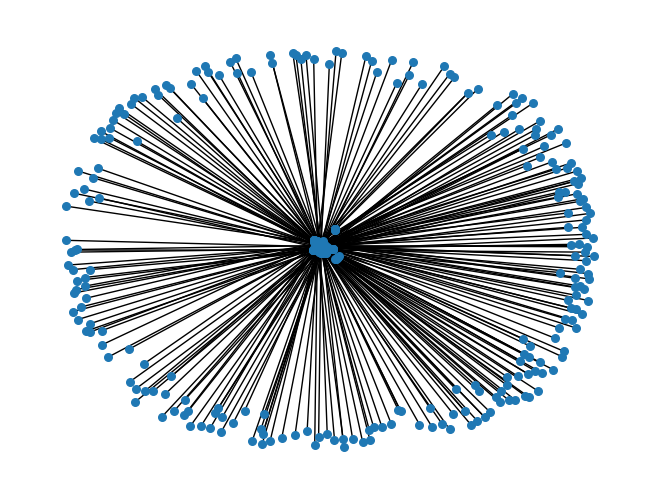

In [20]:
G = nx.Graph()
G.add_nodes_from(df_licitacoes_ctba['Nome Vencedor'], bipartite=0, node_color='y')
G.add_nodes_from(df_licitacoes_ctba['Nome Órgão'], bipartite=1)
#nx.set_node_attributes(G, 'Descrição', pd.Series(row['Descrição'], index=row).to_dict())
#G = nx.from_pandas_dataframe(df, 'node_from', 'node_to', edge_attr=['attribute1','attribute2','attribute3'])
# G.from_pandas_edgelist(
#     [(row['Nome Órgão'], row['Nome Participante'], row['va']) for idx, row in df_licitacoes_ctba.iterrows()], 
#     weight='weight

for idx, row in df_licitacoes_ctba.iterrows():
    G.add_edge(row['Nome Vencedor'], row['Nome Órgão'], weight=row['Valor Licitação'])
    

#print(G.edges(data=True))
nx.draw(G, node_size=30)
plt.show()

In [21]:
nx.is_connected(G)

False

In [22]:
nx.betweenness_centrality(G)

{'ILUMINAR COMERCIO E REPRESENTACOES LTDA': 0.0,
 'MORK SOLAR - PRODUTOS E SERVICOS ELETRICOS LTDA': 0.002822433989645369,
 'COMERCIAL SPONCHIADO LTDA': 0.0012719380791937328,
 'J. J. VITALLI': 0.002750652511994846,
 'GIOVANI LOS': 0.0006951246898977856,
 'LICITARE PRODUTOS, MATERIAIS E SERVICOS LTDA': 0.00026472013694202296,
 'SZATA COMERCIO VAREJISTA LTDA': 0.002822433989645369,
 'MD COMERCIO E SERVICOS DE PINTURA LTDA': 0.0012719380791937328,
 'I.R. COMERCIO E MATERIAIS ELETRICOS LTDA': 0.00026472013694202296,
 'MULTI LITE COMERCIAL ELETRICA LTDA.': 0.0006951246898977856,
 'PROLUX ILUMINACAO LTDA': 0.0006555399294505092,
 'LIBERTY COMERCIO E ATACADISTA LTDA': 0.0,
 'TI COMPONENTES ELETRONICOS LTDA': 0.0,
 'LX DISTRIBUIDORA DE MATERIAIS ELETRICOS LTDA': 0.0012722419608205424,
 'EZ TECHS IMPORTADORA, EXPORTADORA E REPRESENTACOES LTDA': 0.0012722419608205424,
 'EMPALUX ELETROSHOP LTDA': 0.0,
 'GR COMERCIO LTDA': 0.0012722419608205424,
 'OLIVEIRA ARAUJO ENGENHARIA LTDA': 0.0,
 'ENGEPLAN